In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.style.use('ggplot')

from subprocess import check_output

The data file location has changed, it's now in the folder called 'human-resources-data-set'.

In [4]:
df =  pd.read_csv('human-resources-data-set/core_dataset.csv')

Below a first exploration of the data. Starting with the first few rows. Next some details of the data itself.

In [5]:
df.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,...,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,...,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,...,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,...,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,...,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
Employee Name          301 non-null object
Employee Number        301 non-null float64
State                  301 non-null object
Zip                    301 non-null float64
DOB                    301 non-null object
Age                    301 non-null float64
Sex                    301 non-null object
MaritalDesc            301 non-null object
CitizenDesc            301 non-null object
Hispanic/Latino        301 non-null object
RaceDesc               301 non-null object
Date of Hire           301 non-null object
Date of Termination    103 non-null object
Reason For Term        301 non-null object
Employment Status      301 non-null object
Department             301 non-null object
Position               301 non-null object
Pay Rate               301 non-null float64
Manager Name           301 non-null object
Employee Source        301 non-null object
Performance Score      301 non-

In [7]:
df.columns

Index(['Employee Name', 'Employee Number', 'State', 'Zip', 'DOB', 'Age', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'Hispanic/Latino', 'RaceDesc',
       'Date of Hire', 'Date of Termination', 'Reason For Term',
       'Employment Status', 'Department', 'Position', 'Pay Rate',
       'Manager Name', 'Employee Source', 'Performance Score'],
      dtype='object')

In [8]:
df.select_dtypes(include=['float64']).columns.values

array(['Employee Number', 'Zip', 'Age', 'Pay Rate'], dtype=object)

Now, lets check the missing values in the data set

In [9]:
df_isnull = (df.isnull().sum() / len(df))*100
df_isnull = df_isnull.drop(df_isnull[df_isnull ==0]).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ration' :df_isnull})
missing_data

,Missing Ration
Date of Termination,65.894040
Performance Score,0.331126
Hispanic/Latino,0.331126
Employee Number,0.331126
State,0.331126
Zip,0.331126
DOB,0.331126
Age,0.331126
Sex,0.331126
MaritalDesc,0.331126


Date of termination obviously isn't always filled in. Lets fill that up with 'none', we could always change the 'None' values with some numerical stuff.

In [10]:
df['Date of Termination'] = df['Date of Termination'].fillna("None")

In [11]:
df_isnull = (df.isnull().sum() / len(df))*100
df_isnull = df_isnull.drop(df_isnull[df_isnull ==0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ration' :df_isnull})
missing_data



,Missing Ration
Performance Score,0.331126
Employee Source,0.331126
Employee Number,0.331126
State,0.331126
Zip,0.331126
DOB,0.331126
Age,0.331126
Sex,0.331126
MaritalDesc,0.331126
CitizenDesc,0.331126


In [12]:
df.tail()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
297,"Saada, Adell",1.012023e+09,MA,2132.0,7/24/1986,31.0,Female,Married,US Citizen,No,...,11/5/2012,None,N/A - still employed,Active,Software Engineering,Software Engineer,49.25,Alex Sweetwater,Pay Per Click - Google,Fully Meets
298,"Szabo, Andrew",1.201031e+09,MA,2140.0,5/6/1983,34.0,Male,Single,US Citizen,No,...,7/7/2014,None,N/A - still employed,Active,Software Engineering,Software Engineer,48.00,Alex Sweetwater,MBTA ads,Exceptional
299,"True, Edward",1.102024e+09,MA,2451.0,6/14/1983,34.0,Male,Single,Non-Citizen,No,...,2/18/2013,4/15/2014,medical issues,Voluntarily Terminated,Software Engineering,Software Engineer,45.42,Alex Sweetwater,Diversity Job Fair,Fully Meets
300,"Sweetwater, Alex",1.001645e+09,MA,2184.0,11/22/1966,51.0,Male,Single,US Citizen,No,...,8/15/2011,None,N/A - still employed,Active,Software Engineering,Software Engineering Manager,27.00,Jennifer Zamora,Search Engine - Google Bing Yahoo,Fully Meets
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I get the feeling that some lines are simply not filled, perhaps an error in the data set. Looking at the df.tail() is see on line 301 empty fields. Lets assume this is the case in the rest of the data set as well and clear those rows, we simply don't need those.

In [13]:
df = df[df.Position.notnull()]


In [14]:
df_isnull = (df.isnull().sum() / len(df))*100
df_isnull = df_isnull.drop(df_isnull[df_isnull ==0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ration' :df_isnull})
missing_data


,Missing Ration


Great! No more missing values!

It's time to visualize some of the data starting with a correlation plot to see our first entry of future exploring.

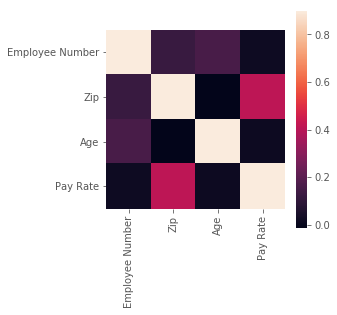

In [17]:
corrmat = df.corr()
plt.subplots(figsize=(4,4))
sns.heatmap(corrmat, vmax=0.9, square=True)

Pay Rate seems to be related with Zip code. Lets explore that in more detail!

C:\Users\vivek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


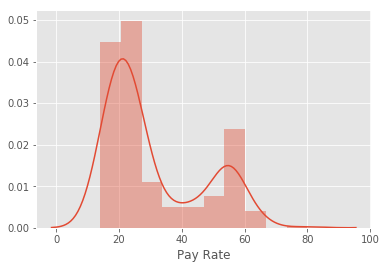

In [18]:
sns.distplot(df['Pay Rate'])

In [19]:
print(df['Pay Rate'].describe())
print("\nMedian of pay rate is: ", df['Pay Rate'].median(axis = 0))

count    301.000000
mean      30.715249
std       15.216214
min       14.000000
25%       20.000000
50%       24.000000
75%       43.000000
max       80.000000
Name: Pay Rate, dtype: float64

Median of pay rate is:  24.0


C:\Users\vivek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


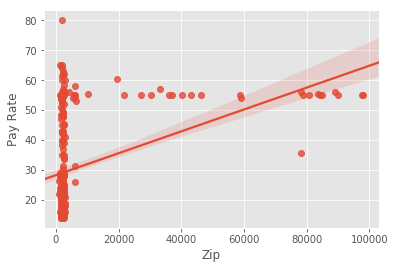

In [20]:
sns.regplot( x = 'Zip', y = 'Pay Rate', data = df)

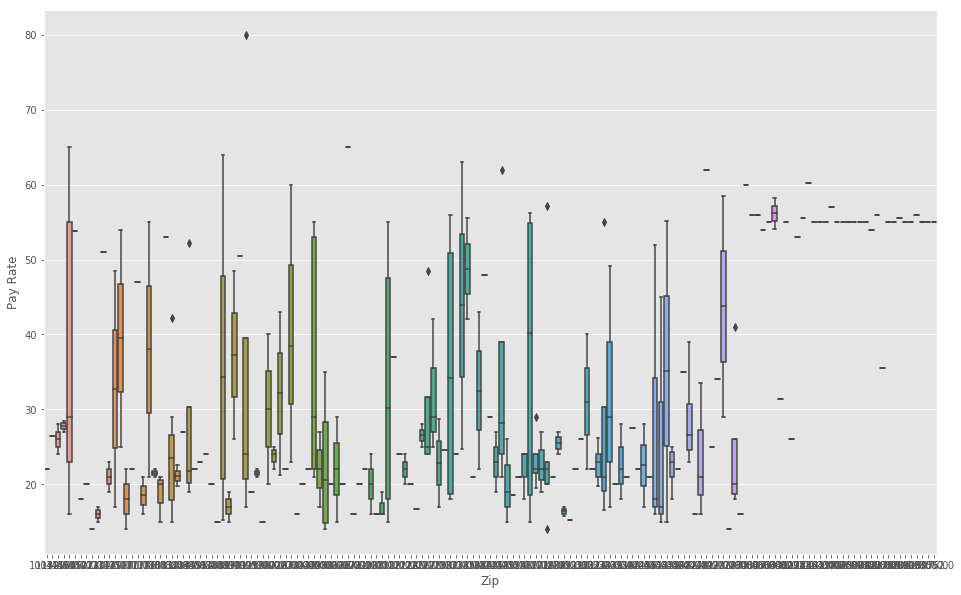

In [21]:
plt.figure(figsize = (16, 10))

sns.boxplot(x = 'Zip', y = 'Pay Rate', data = df)

I'm not convinced that Zip code and Pay Rate is really correlated. It makes sense though that matplotlib sees a correlation since most of the employees live in a certain Zip code area.

Let's explore that relation between age and Pay Rate

C:\Users\vivek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


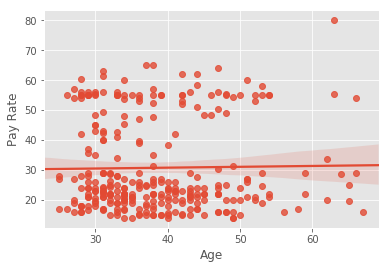

In [22]:
sns.regplot( x = 'Age', y = 'Pay Rate', data = df)

I realize now that it is quite inconvenient that there are spaces in the column names. So, I am going to do something about that.

In [23]:
df.rename(columns={
    'Pay Rate': 'PayRate',
    'Employee Name': 'EmployeeName',
    'Employee Number': 'EmployeeNumber',
    'Hispanic/Latino': 'HispLat',
    'Date of Hire': 'DateHire',
    'Days Employed': 'DaysEmployed',
    'Date of Termination': 'DateTerm',
    'Reason For Term': 'ReasonTerm',
    'Employment Status': 'EmployStatus',
    'Manager Name': 'ManagerName',
    'Employee Source': 'EmployeeSource',
    'Performance Score': 'PerformanceScore'

}, inplace=True)

In [24]:
df.head()

,EmployeeName,EmployeeNumber,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,HispLat,...,DateHire,DateTerm,ReasonTerm,EmployStatus,Department,Position,PayRate,ManagerName,EmployeeSource,PerformanceScore
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,...,10/27/2008,None,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,...,1/6/2014,None,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,...,9/29/2014,None,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,...,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,...,5/1/2015,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


Looks better now!

I want to change hispanic latino into numerical data by saying No becomes a zero and a Yes becomes a one.

In [25]:
HispLat_map ={'No': 0, 'Yes': 1, 'no': 0, 'yes': 1}
df['HispLat'] = df['HispLat'].replace(HispLat_map)
df['HispLat']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     0
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     1
24     0
25     0
26     0
27     0
28     1
29     0
      ..
271    0
272    0
273    0
274    0
275    0
276    0
277    0
278    0
279    1
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
Name: HispLat, Length: 301, dtype: int64

And probably good to do the same for Sex but first explore how sexes are written down (Capitals or not).

In [26]:
pd.crosstab(df.CitizenDesc, df.Sex)

Sex,Female,Male,male
CitizenDesc,,,
Eligible NonCitizen,6,6,0
Non-Citizen,3,1,0
US Citizen,165,119,1


Ok so in this case, females become a zero and males a one.

In [27]:
Sex_map ={'Female': 0, 'Male': 1, 'male': 0}
df['Sex'] = df['Sex'].replace(Sex_map)
pd.crosstab(df.CitizenDesc, df.Sex)

Sex,0,1
CitizenDesc,,
Eligible NonCitizen,6,6
Non-Citizen,3,1
US Citizen,166,119


Doing a little bit of Sexes exploration...

In [28]:
pd.crosstab(df.State, df.Sex)

Sex,0,1
State,,
AL,0,1
AZ,1,0
CA,1,0
CO,0,1
CT,3,3
FL,1,0
GA,1,0
ID,0,1
IN,1,0


Trying to figure out whether HispLat and PayRate are related.

C:\Users\vivek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


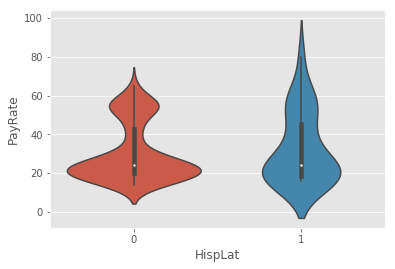

In [29]:
sns.violinplot('HispLat', 'PayRate', data = df)

Women and man and PayRate...

C:\Users\vivek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


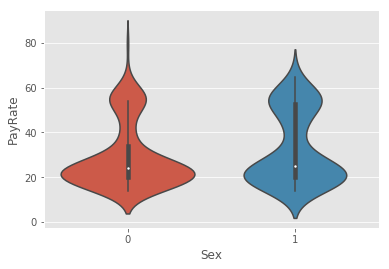

In [30]:
sns.violinplot('Sex', 'PayRate', data = df)

And what about the performance scores?

In [31]:
pd.crosstab(df.Sex.values, df.PerformanceScore.values)

col_0,90-day meets,Exceeds,Exceptional,Fully Meets,N/A- too early to review,Needs Improvement,PIP
row_0,,,,,,,
0,19,17,5,98,26,5,5
1,12,11,4,74,11,10,4


Interesting. This will probably need some exploration. Not yet though, first I will explore other stuff first such as marital status, HispLat and Performance over the sexes and the PayRate

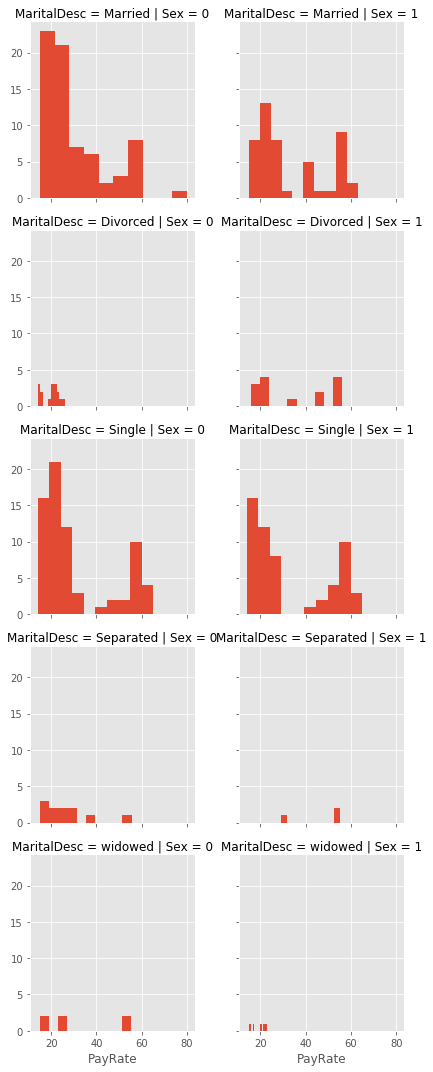

In [32]:
g = sns.FacetGrid(df, col='Sex', row='MaritalDesc')
g.map(plt.hist, 'PayRate')

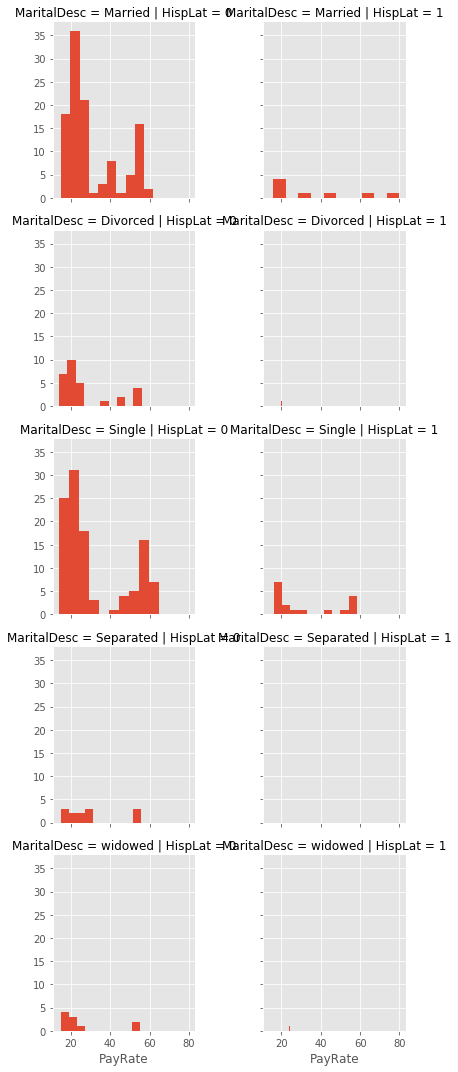

In [33]:
g = sns.FacetGrid(df, col='HispLat', row='MaritalDesc')
g.map(plt.hist, 'PayRate')

Interesting stuff!

Looking forward to explore the performance score even more. Lets start this by checking the mean of PayRate and Age in combination with this score.

In [36]:
df[['PerformanceScore', 'PayRate', 'Age']].groupby(['PerformanceScore'], 
as_index=False).mean()

,PerformanceScore,PayRate,Age
0,90-day meets,31.836129,37.516129
1,Exceeds,30.021429,40.285714
2,Exceptional,38.472222,37.666667
3,Fully Meets,30.678837,39.505814
4,N/A- too early to review,28.074595,34.702703
5,Needs Improvement,32.700000,35.800000
6,PIP,29.500000,39.666667


Let's group the PerformanceScores like this:

90-day meets = 2
Exceeds = 3
Exceptional = 4
Fully Meets = 2
N/A = 0
Needs Improvement = 1
PIP = 1


In [37]:
PerfScore_map = {'90-day meets': 2, 'Exceeds': 3, 'Exceptional': 4, 'Fully Meets': 2, 'N/A- too early to review': 0,
                'Needs Improvement': 1, 'PIP': 1}

df['PerformanceScore'] = df['PerformanceScore'].replace(PerfScore_map)



In [38]:
df.head()

,EmployeeName,EmployeeNumber,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,HispLat,...,DateHire,DateTerm,ReasonTerm,EmployStatus,Department,Position,PayRate,ManagerName,EmployeeSource,PerformanceScore
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,0,Married,US Citizen,0,...,10/27/2008,None,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,2
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,1,Divorced,US Citizen,0,...,1/6/2014,None,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,2
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,1,Single,US Citizen,0,...,9/29/2014,None,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,2
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,0,Married,US Citizen,0,...,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,0
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,0,Single,US Citizen,0,...,5/1/2015,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,0


Ok how does working for a specific manager impact your performance score?

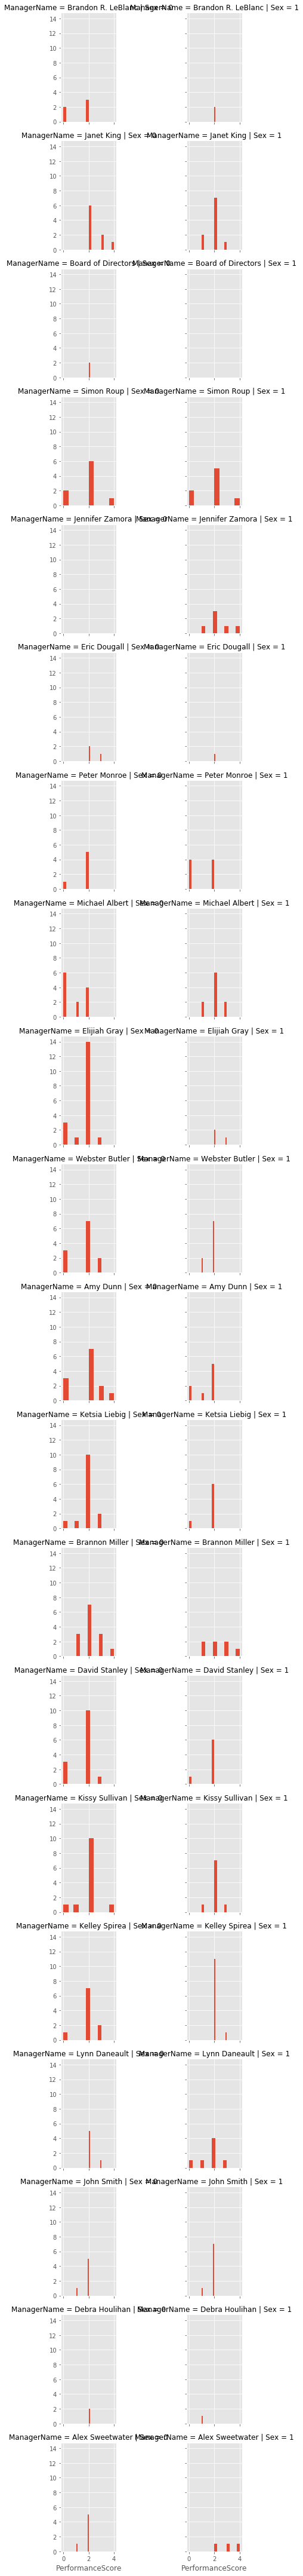

In [39]:
g = sns.FacetGrid(df, col='Sex', row='ManagerName')
g.map(plt.hist, 'PerformanceScore')

Working for Janet King as a woman gives you a big change of being graded with a higher score that 'Fully Meets' (mapped as 2). Working for Michael Albert though, is a little bit of since you'll have more change of needing improvement if you're a woman.

Exploring where your employees come from and their performance might give you good insight in where you should find your next employee

In [40]:
pd.crosstab(df.EmployeeSource.values, df.PerformanceScore.values) 

col_0,0,1,2,3,4
row_0,,,,,
Billboard,1,2,11,1,1
Careerbuilder,0,0,1,0,0
Company Intranet - Partner,0,0,1,0,0
Diversity Job Fair,3,4,16,5,1
Employee Referral,5,0,21,2,3
Glassdoor,1,1,11,1,0
Information Session,1,0,2,1,0
Internet Search,1,1,4,0,0
MBTA ads,0,3,9,3,2


Apparently, looking at the above plot, employees receive a higher performance score when they are coming from the professional society and through MBTA ads.

Word of mouth is not so well for the performance score...

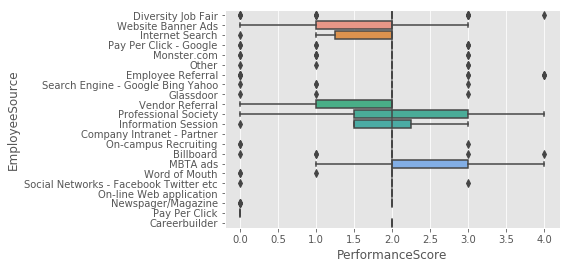

In [42]:
sns.boxplot(y = 'EmployeeSource', x = 'PerformanceScore', data = df)

A nice boxplot shows it even better ^

Now let's see which manager gives you as an employee the change for a high performance score:

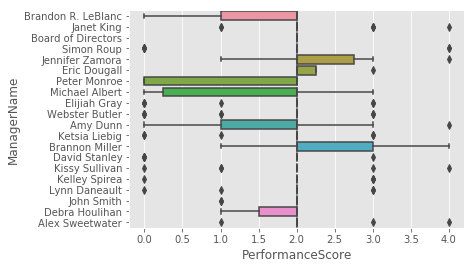

In [43]:
sns.boxplot(y = 'ManagerName', x = 'PerformanceScore', data = df)

Working for a manager drastically impacts your performance score. Perhaps good to explore this further with the other data sources. Maybe we can find out why?

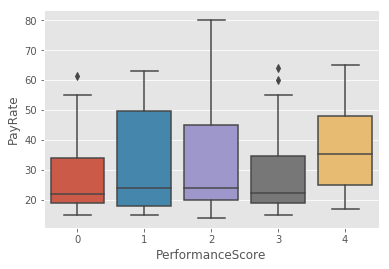

In [44]:
sns.boxplot(y = 'PayRate', x = 'PerformanceScore', data = df)

According to above plot, you see the median being exceptionally high compared with the others for the pay rate and scoring a exceptional performance.

Let's find out if race description has impact on performance and pay rate:

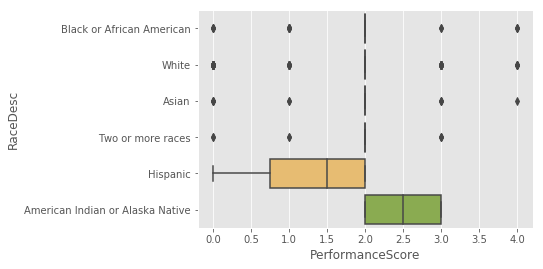

In [45]:
sns.boxplot(y = 'RaceDesc', x = 'PerformanceScore', data = df)

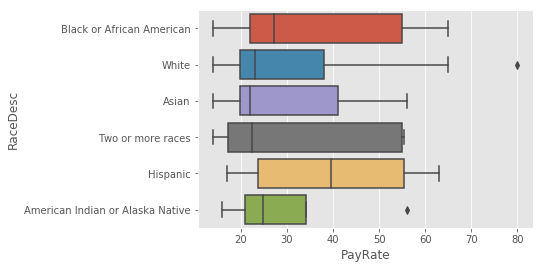

In [46]:
sns.boxplot(y = 'RaceDesc', x = 'PayRate', data = df)

And your Marital description:

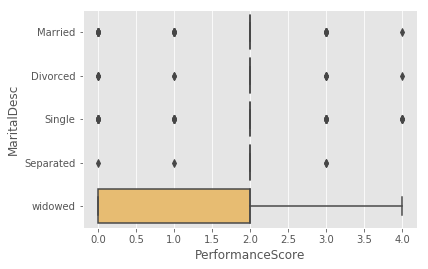

In [47]:
sns.boxplot(y = 'MaritalDesc', x = 'PerformanceScore', data = df)

Performance and performance score is a key reason for breaking up. Women who went on maternity leave and didn't return actually performed very well. Too bad they left the organisation!

Overal you can clearly see that the break up and the performance are related.

What else is there to find in this core data set?